### Imports

In [38]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPool2D, Dense, Activation, Flatten
from keras import backend as K

### Load data from pickle

In [39]:
with open('trainX.pickle', 'rb') as f:
    trainX = list(pickle.load(f))
    trainX=np.array(trainX)

with open('trainY.pickle', 'rb') as f:
    trainY = list(pickle.load(f))
    trainY=np.array(trainY)
with open('testX.pickle', 'rb') as f:
    testx = list(pickle.load(f))
    testx=np.array(testx)

<function matplotlib.pyplot.show(*args, **kw)>

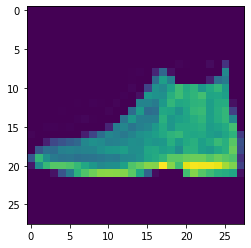

In [40]:
plt.imshow(testx[0])
plt.show

### Reshape and spliting of train and test set

In [41]:
from keras.utils.np_utils import to_categorical
trainX=trainX.reshape(trainX.shape[0],trainX.shape[1],trainX.shape[2],1)
trainX=trainX/255
testx=testx.reshape(testx.shape[0],testx.shape[1],testx.shape[2],1)
testx=testx/255
trainY = to_categorical(trainY)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.2)

### Model 

In [42]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 32)          12832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              525312    
__________

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 37s 767us/step - loss: 0.9337 - acc: 0.6672 - val_loss: 0.5202 - val_acc: 0.8008
Epoch 2/30
48000/48000 [==============================] - 36s 748us/step - loss: 0.4845 - acc: 0.8185 - val_loss: 0.4396 - val_acc: 0.8368
Epoch 3/30
48000/48000 [==============================] - 36s 746us/step - loss: 0.4112 - acc: 0.8486 - val_loss: 0.3758 - val_acc: 0.8590
Epoch 4/30
48000/48000 [==============================] - 35s 738us/step - loss: 0.3643 - acc: 0.8663 - val_loss: 0.3657 - val_acc: 0.8635
Epoch 5/30
48000/48000 [==============================] - 35s 737us/step - loss: 0.3395 - acc: 0.8753 - val_loss: 0.3515 - val_acc: 0.8714
Epoch 6/30
48000/48000 [==============================] - 35s 735us/step - loss: 0.3156 - acc: 0.8845 - val_loss: 0.3089 - val_acc: 0.8860
Epoch 7/30
48000/48000 [==============================] - 36s 742us/step - loss: 0.3047 - acc: 0.8881 - val_loss: 0.

### loss and Accuracy

In [46]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.31399243644624947
Test accuracy: 0.9080833333333334


### Prediction

In [24]:
y_test=model.predict(testx)
y_test=y_test.argmax(axis=1)
pickle.dump(y_test, open("testY.pickle", "wb"))